## Data Cleaning & Exploration

The database containing the bestselling books on Amazon between 2009 and 2019 can be downloaded from Kaggle. It carries data related to titles, authors, genre, rating, and so on. Here I will delve into this dataset in order to extract information about different features.

In [1]:
#loading the necessary python libraries
import numpy as np
import pandas as pd

import seaborn as sns
sns.set(font_scale = 1.5)

import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
plt.style.use('fivethirtyeight')

In [2]:
#loading the dataset into a pandas dataframe
amazon_books = pd.read_csv('../data-sources/amazon-bestsellers/amazon-bestsellers.csv')
amazon_books.head()

,Name,Author,User Rating,Reviews,Price,Year,Genre
0,10-Day Green Smoothie Cleanse,JJ Smith,4.7,17350,8,2016,Non Fiction
1,11/22/63: A Novel,Stephen King,4.6,2052,22,2011,Fiction
2,12 Rules for Life: An Antidote to Chaos,Jordan B. Peterson,4.7,18979,15,2018,Non Fiction
3,1984 (Signet Classics),George Orwell,4.7,21424,6,2017,Fiction
4,"5,000 Awesome Facts (About Everything!) (Natio...",National Geographic Kids,4.8,7665,12,2019,Non Fiction


In [3]:
#renaming dataframe columns
amazon_books.columns = ['name', 'author', 'rating', 'reviews', 'price', 'year', 'genre']

In [4]:
#displaying the index and column info
amazon_books.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550 entries, 0 to 549
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   name     550 non-null    object 
 1   author   550 non-null    object 
 2   rating   550 non-null    float64
 3   reviews  550 non-null    int64  
 4   price    550 non-null    int64  
 5   year     550 non-null    int64  
 6   genre    550 non-null    object 
dtypes: float64(1), int64(3), object(3)
memory usage: 30.2+ KB


In [5]:
#reviewing the basic statistics derived from the data 
amazon_books.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
name,550,351,Publication Manual of the American Psychologic...,10,NaN,NaN,NaN,NaN,NaN,NaN,NaN
author,550,248,Jeff Kinney,12,NaN,NaN,NaN,NaN,NaN,NaN,NaN
rating,550,NaN,NaN,NaN,4.61836,0.22698,3.3,4.5,4.7,4.8,4.9
reviews,550,NaN,NaN,NaN,11953.3,11731.1,37,4058,8580,17253.2,87841
price,550,NaN,NaN,NaN,13.1,10.8423,0,7,11,16,105
year,550,NaN,NaN,NaN,2014,3.16516,2009,2011,2014,2017,2019
genre,550,2,Non Fiction,310,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Jeff Kinney with 12 appearances is the bestselling author, while the Publication Manual of the Americal Psychological Association is the bestselling book.

As expected from a list of bestsellers, 75% of these books are rated 4.5 and above, while the minimum rating is 3.3. On the other hand, three quarters of the available titles have been reviewed a minimum of 4058 times. Considering the price, 75% of the available books cost $16 or less.

In [6]:
#calculating the proportion of books belonging to each genre
amazon_books['genre'].value_counts(normalize=True)

Non Fiction    0.563636
Fiction        0.436364
Name: genre, dtype: float64

Non-fiction books outnumber fiction books by a small margin, accounting for 56.36% of the bestselling titles.

### Yearly Trends

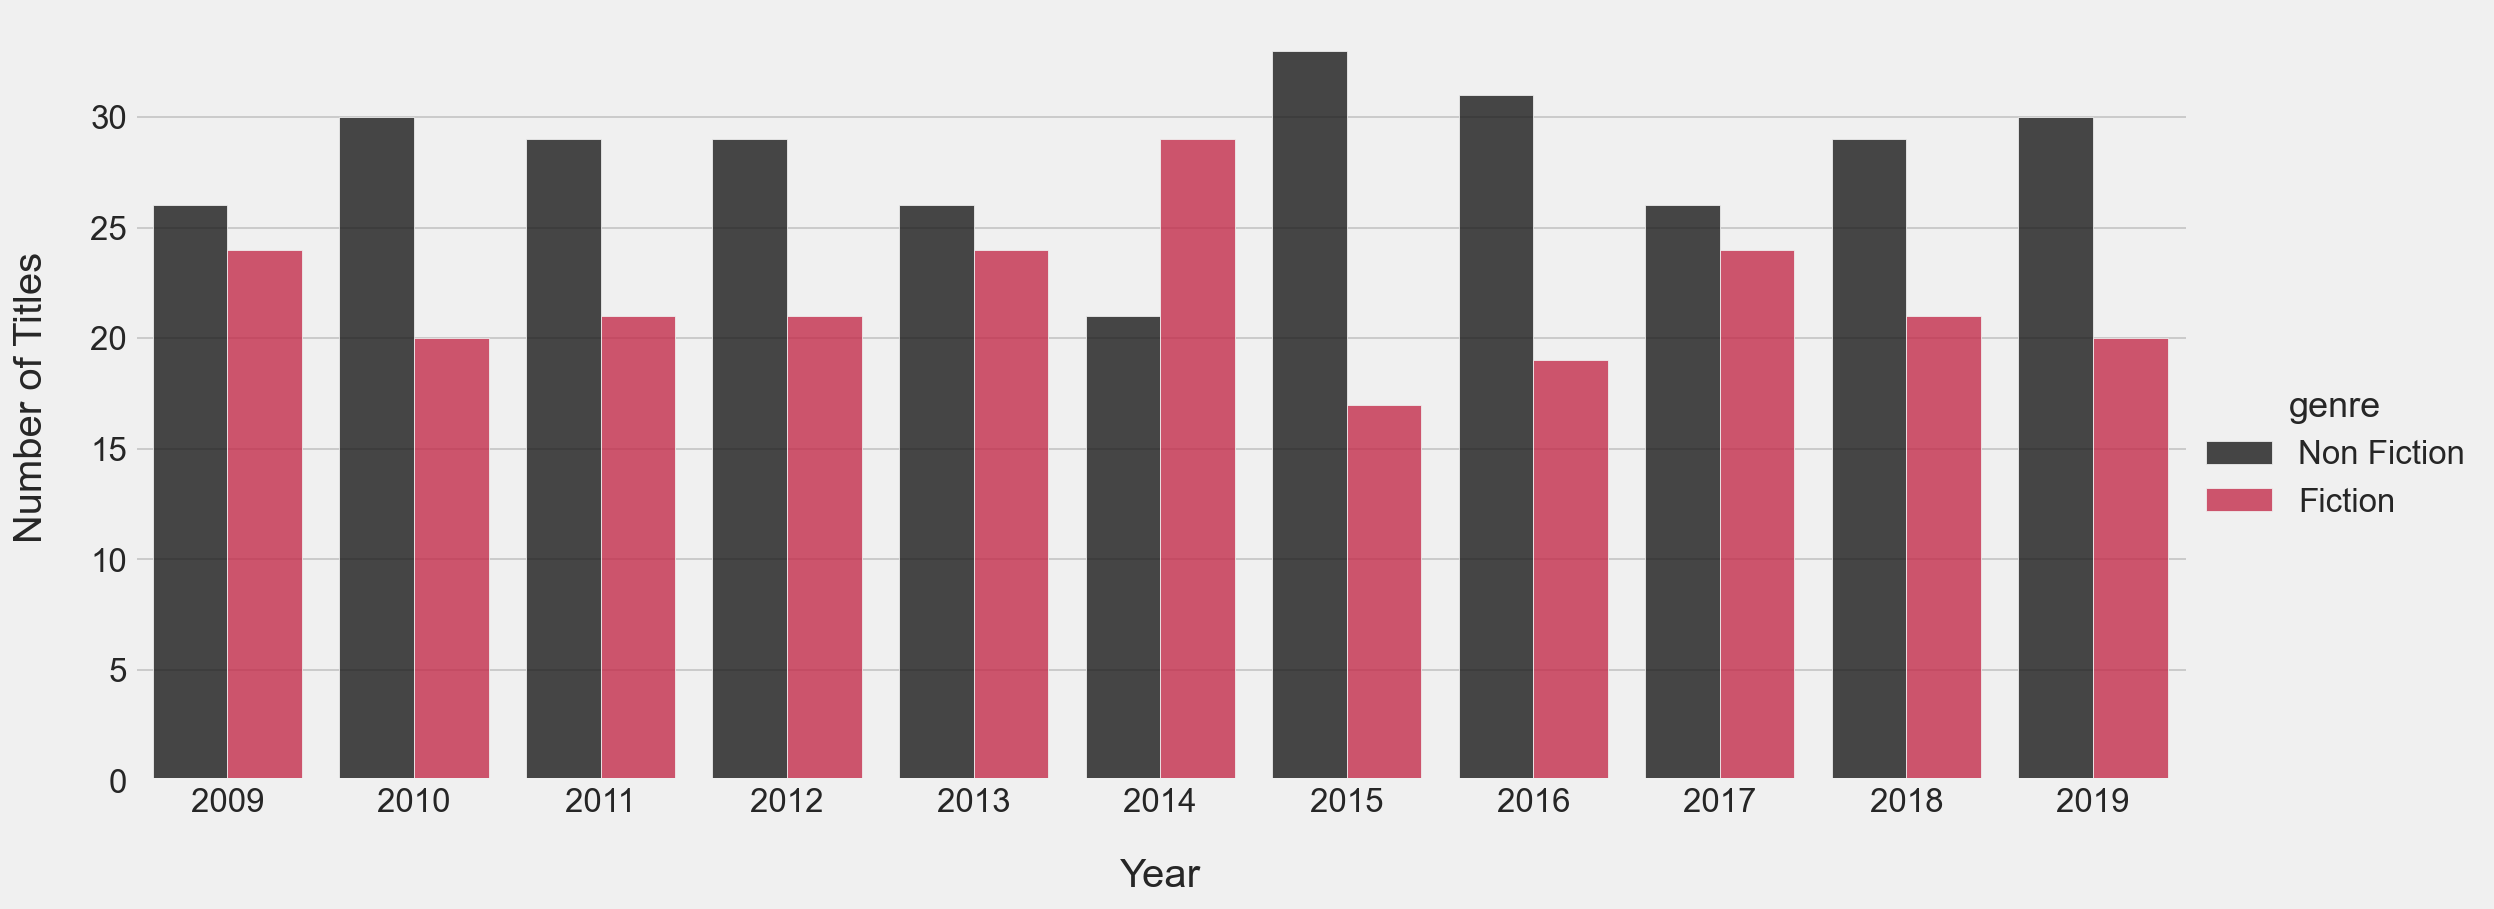

In [7]:
#creating a bar plot to display the number of fiction and non-fiction bestsellers in each year
sns.catplot(data=amazon_books, x='year', hue='genre', kind='count',
            alpha=0.8, height=6, aspect=15/6, palette=['k', 'crimson'])
plt.xlabel('Year', fontsize=20, labelpad=20)
plt.ylabel('Number of Titles', fontsize=20, labelpad=20)
plt.show()

As can be seen from the graph above, in every year bar 2014, the majority of bestselling titles are have been non-fiction books.

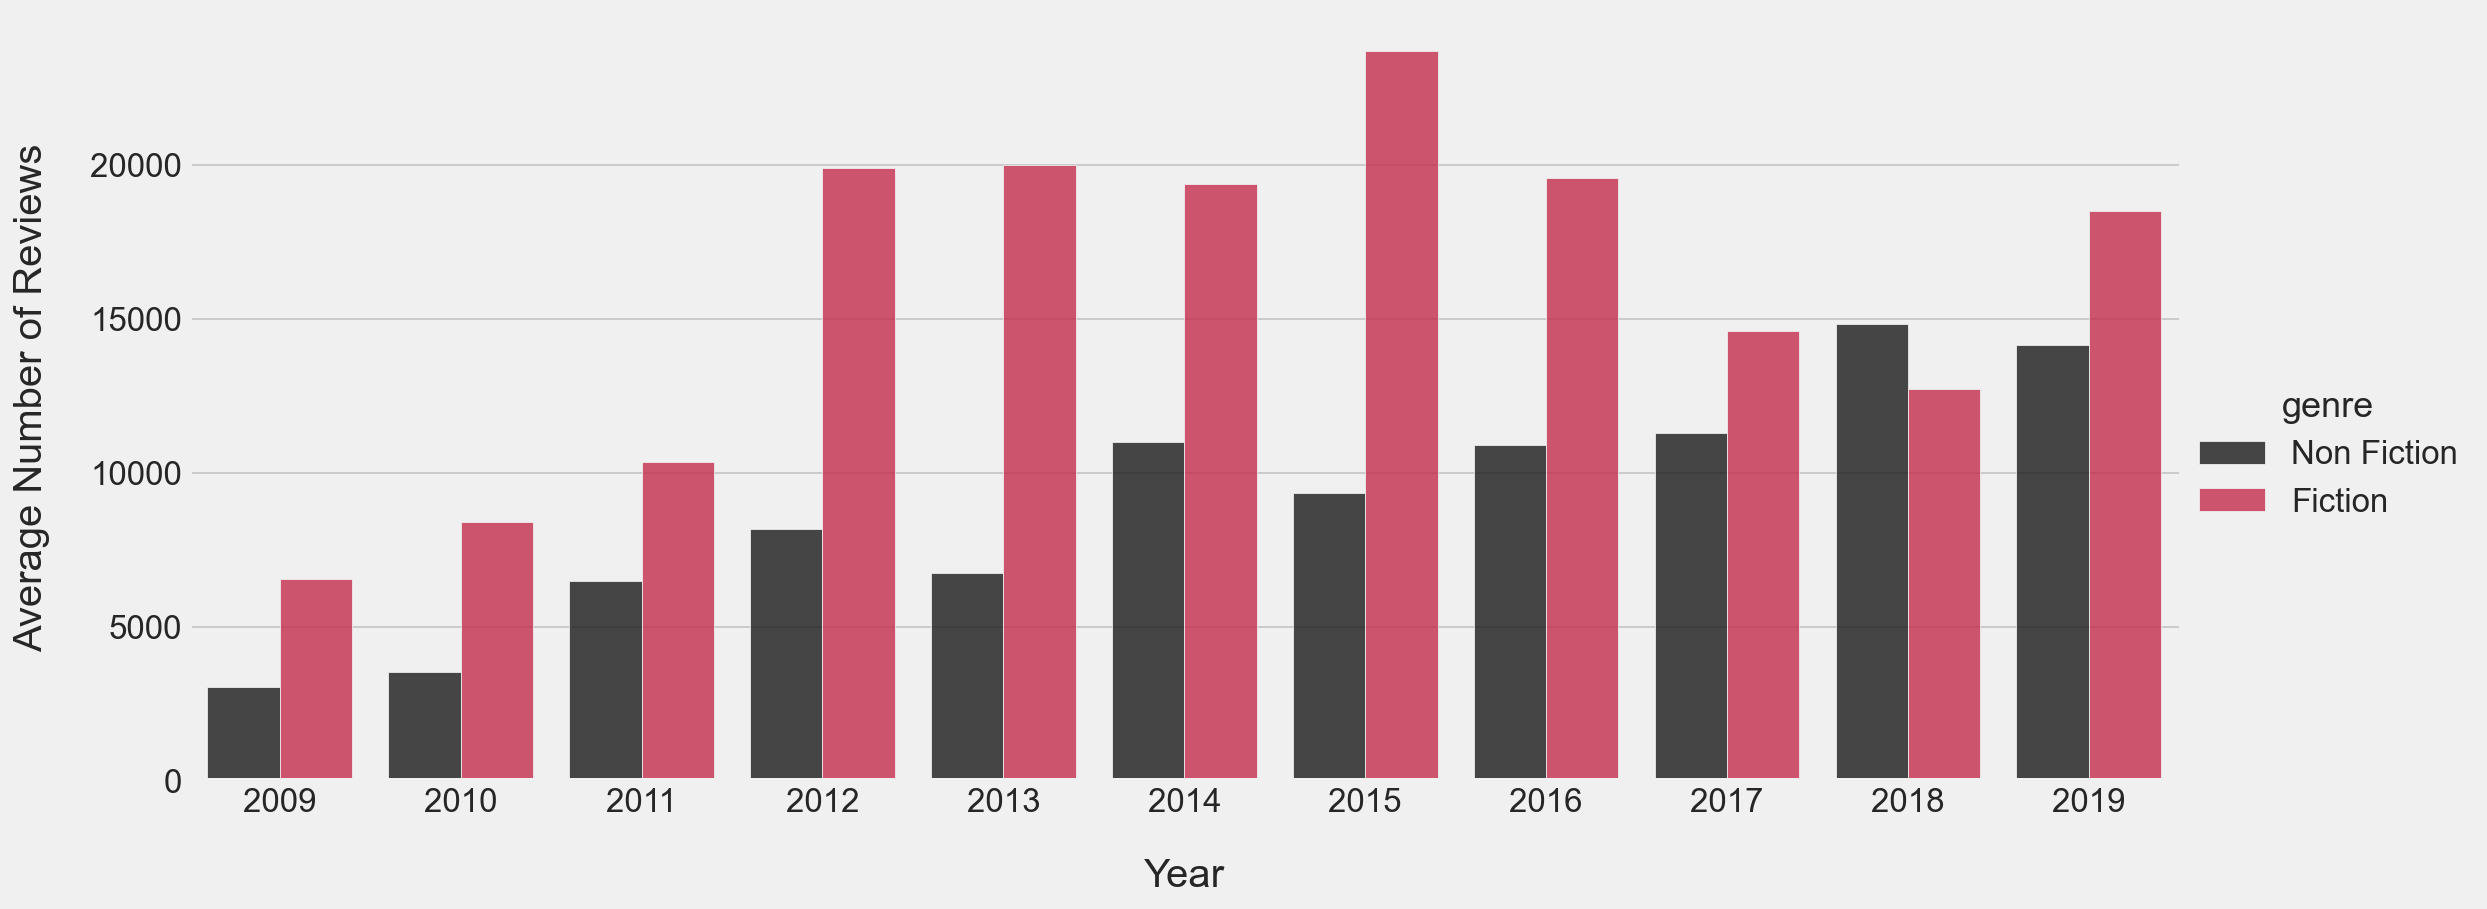

In [8]:
#creating a bar plot to display the average number of reviews for each genre during each year
sns.catplot(data=amazon_books, x='year', y='reviews', hue='genre',
            kind='bar', alpha=0.8, height=6, aspect=15/6, ci=None,
            palette=['k', 'crimson'])
plt.xlabel('Year', fontsize=20, labelpad=20)
plt.ylabel('Average Number of Reviews', fontsize=20, labelpad=20)
plt.show()

On the other hand, fictions tend to receive higher number of reviews, with 2018 being the only year that bucks the trend. The graph above also displays a general rise in the total number of reviews for both genres over the years. 

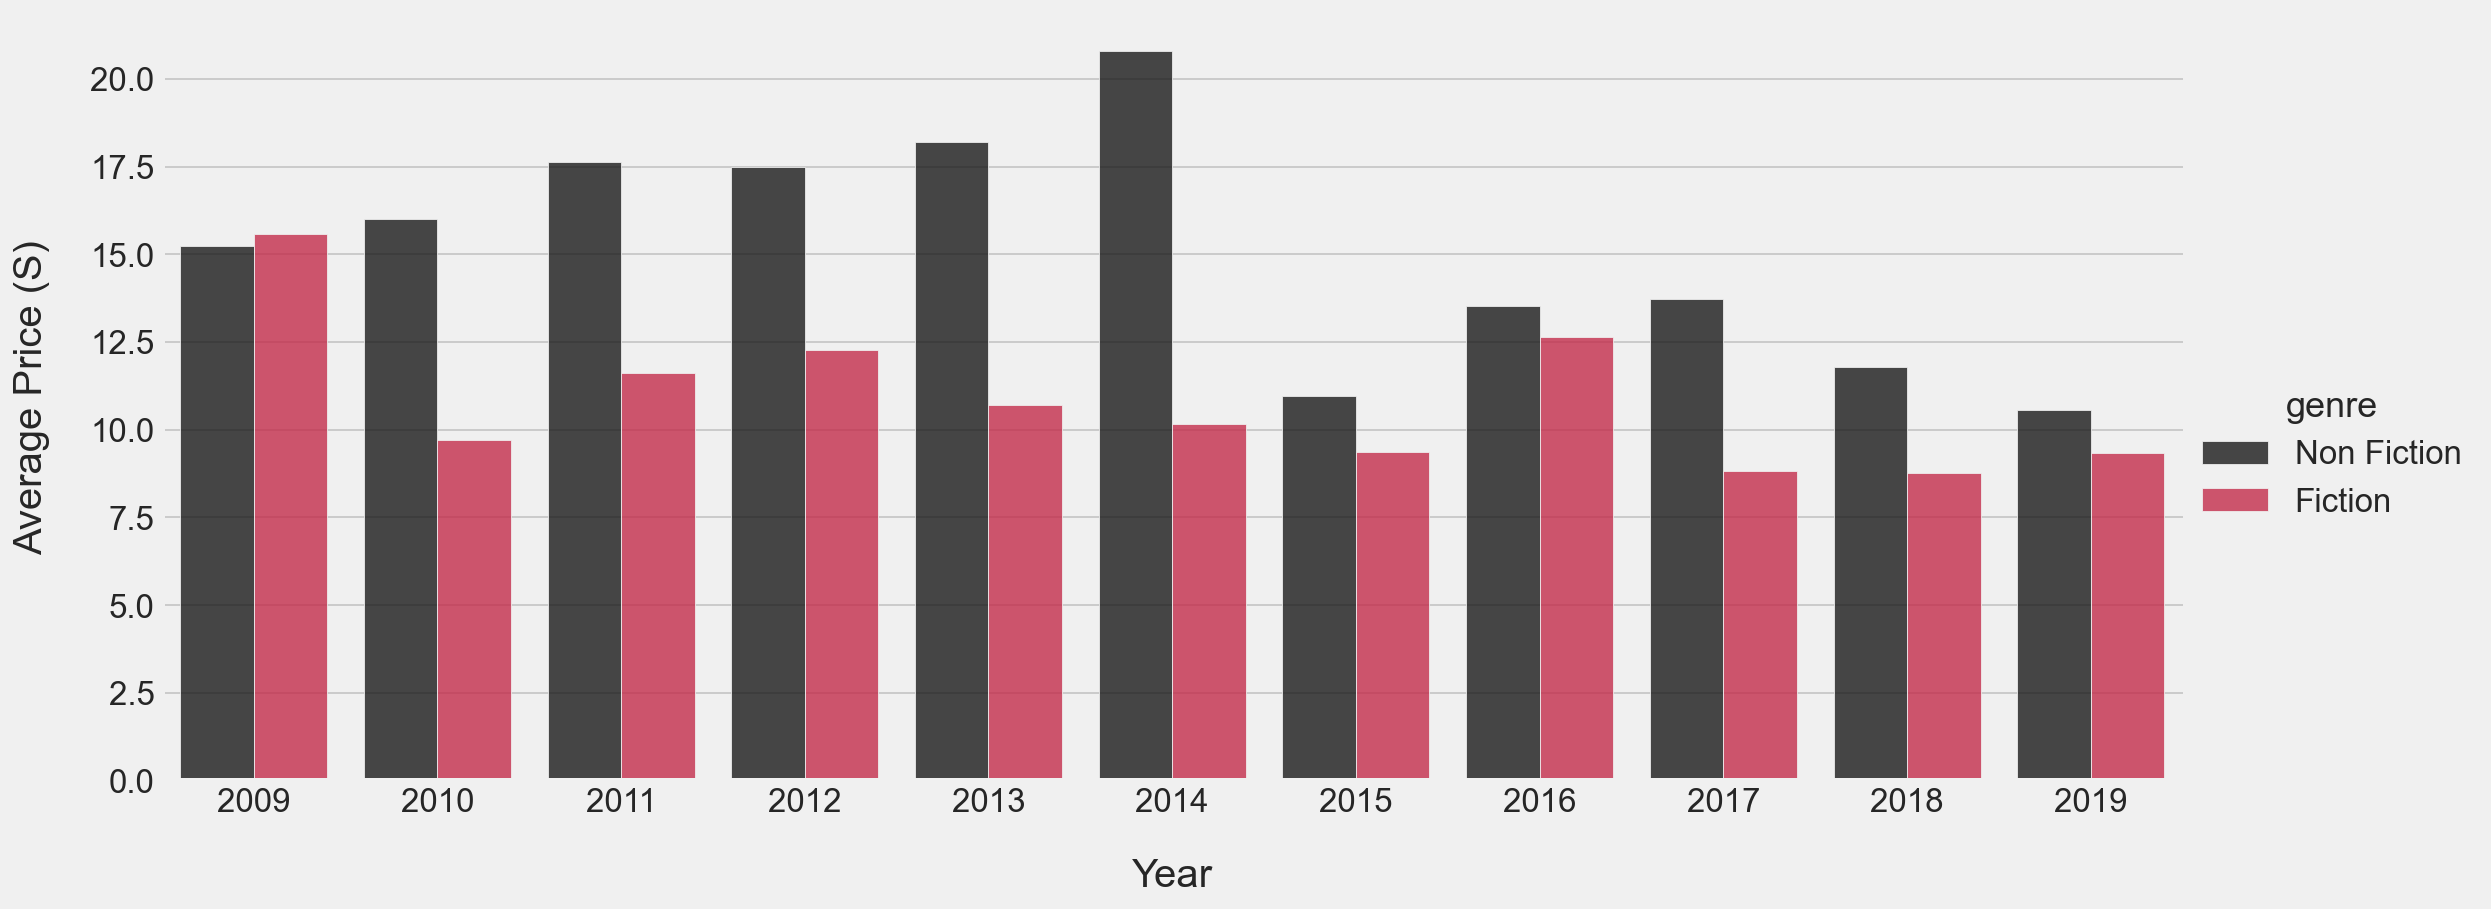

In [9]:
#creating a bar plot to display the average price for each genre in each year
sns.catplot(data=amazon_books, x='year', y='price', hue='genre',
            kind='bar', alpha=0.8, height=6, aspect=15/6, ci=None,
            palette=['k', 'crimson'])
plt.xlabel('Year', fontsize=20, labelpad=20)
plt.ylabel('Average Price (S)', fontsize=20, labelpad=20)
plt.show()

Non-fiction titles generally attract a higher price, with 2009 being the only exception. We can also see from the graph above that the difference between the two genres was has been reduced since 2015, with non-fiction titles exhibiting a significant reduction in price.

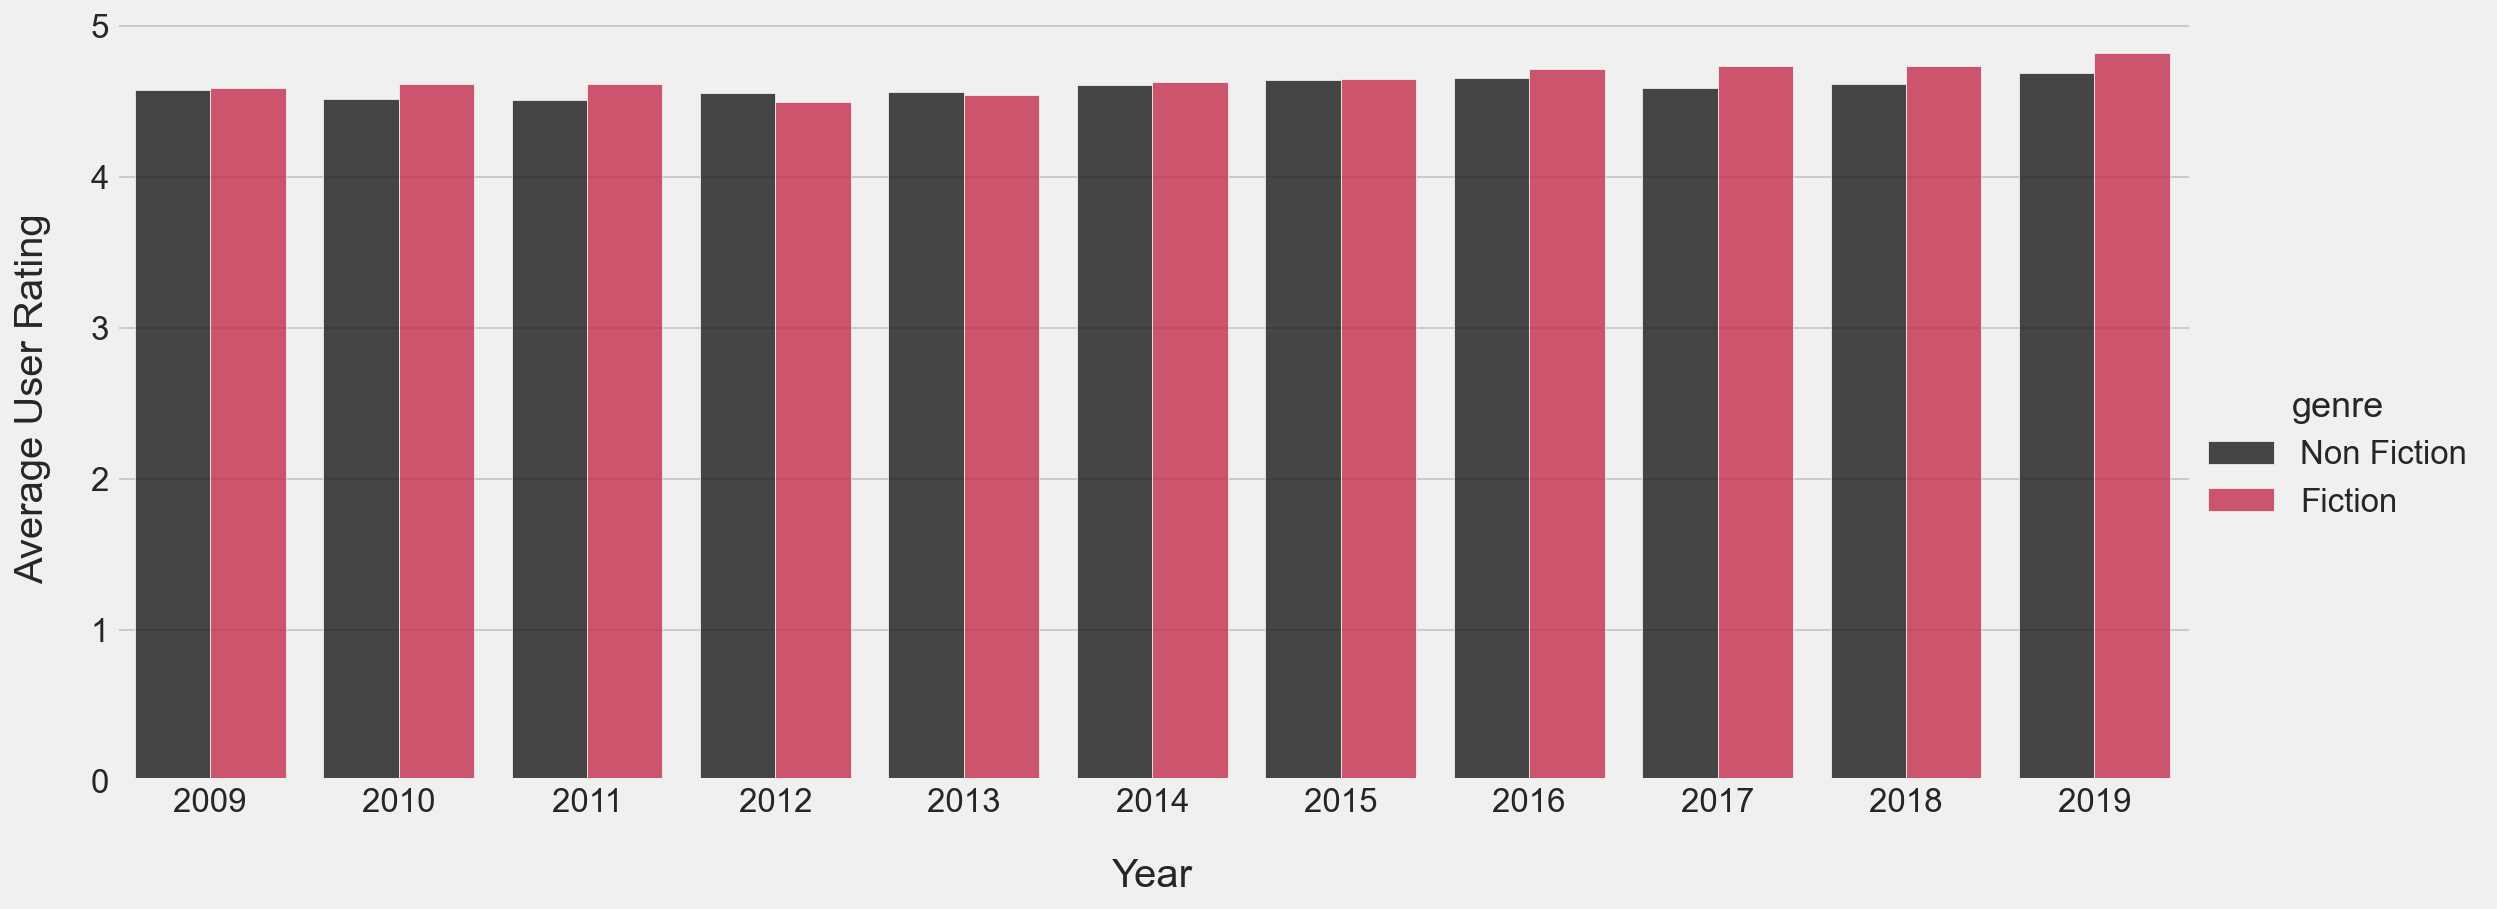

In [10]:
#creating a bar plot to display the average user rating for each genre during each year
sns.catplot(data=amazon_books, x='year', y='rating', hue='genre',
            kind='bar', alpha=0.8, height=6, aspect=15/6, ci=None,
            palette=['k', 'crimson'])
plt.xlabel('Year', fontsize=20, labelpad=20)
plt.ylabel('Average User Rating', fontsize=20, labelpad=20)
plt.show()

Although both genres have consistantly achieved very high average ratings over the years, fictions appear to have received increasingly higher ratings in recent years. Fictions have also been rated slightly higher in most years when compared to non-fiction titles.

### Top Authors

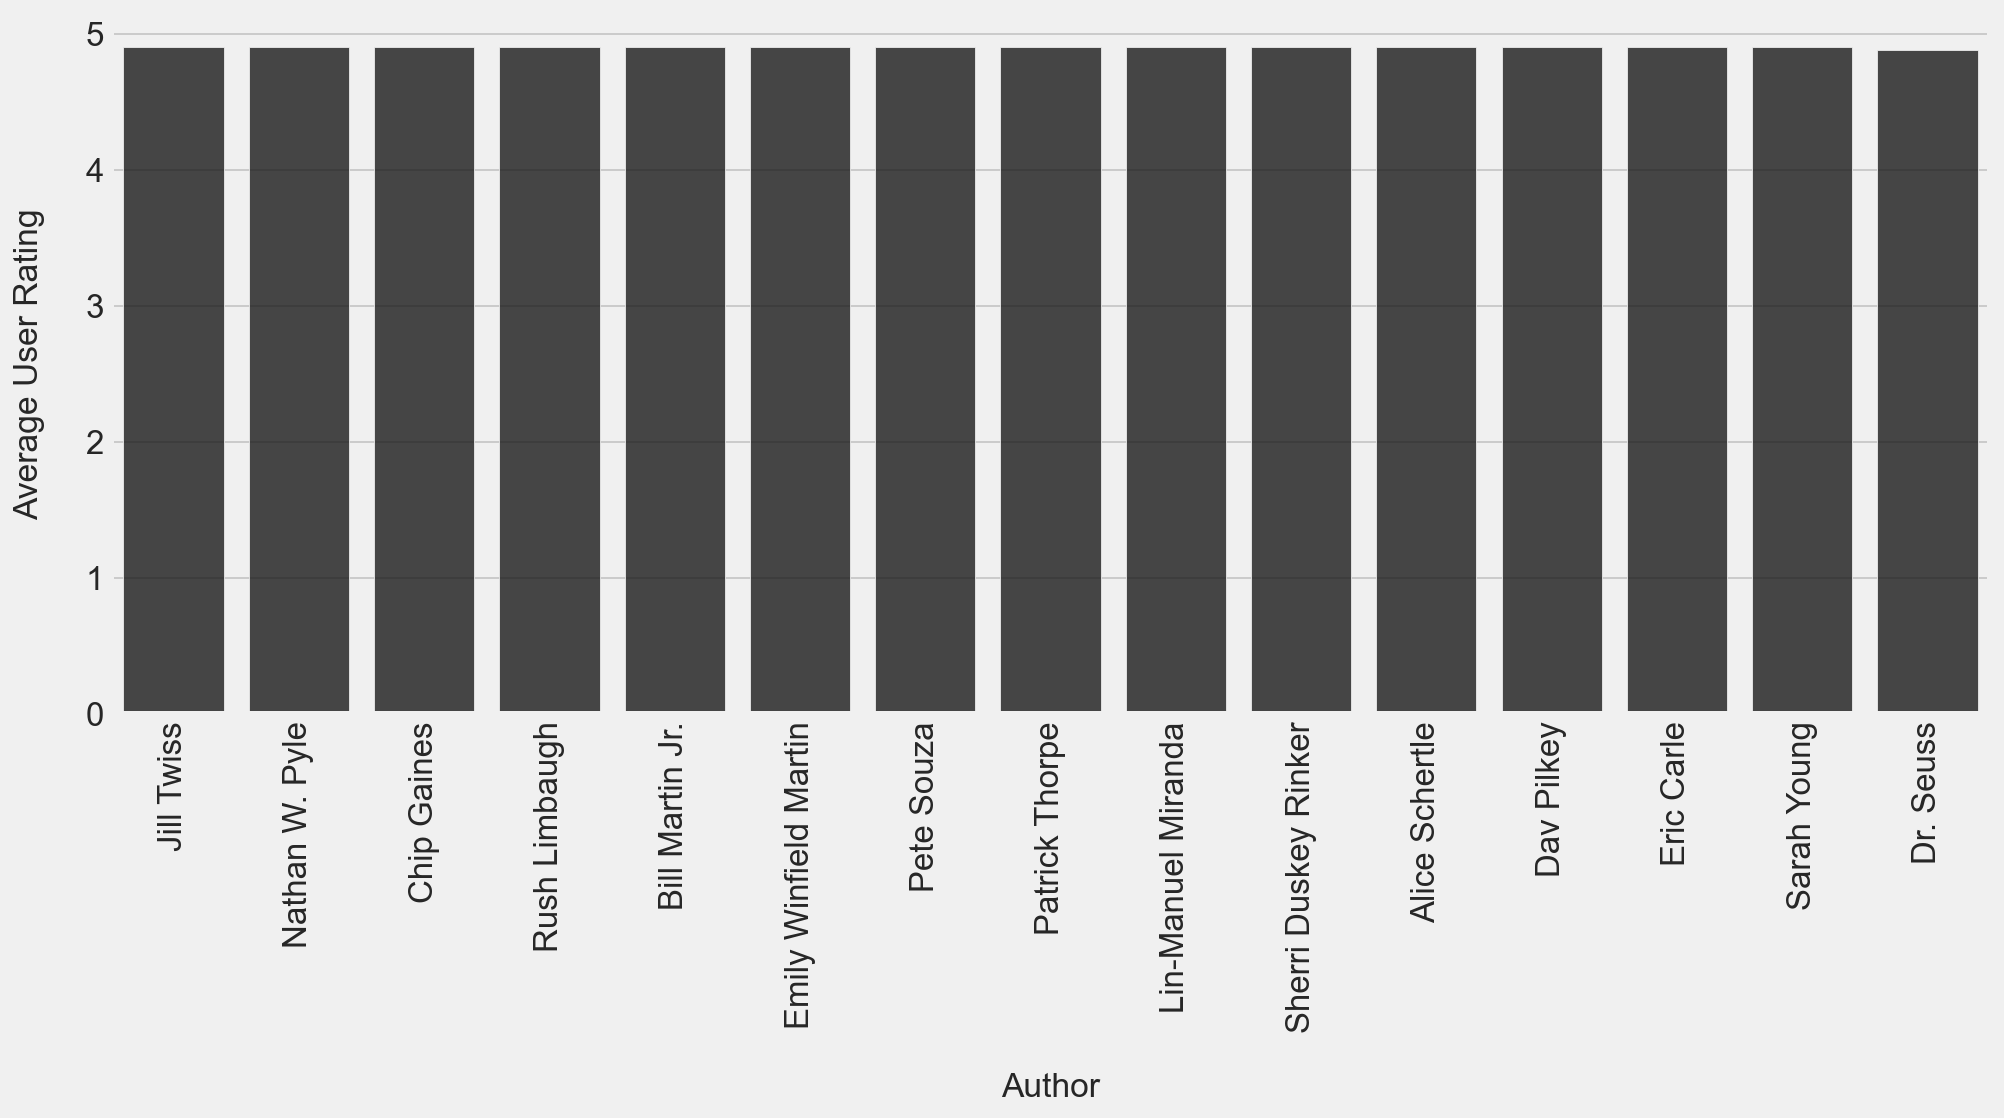

In [11]:
#plotting the highest rated authors by average user rating
highest_rated_authors = amazon_books.groupby('author', as_index=False)[['rating']].mean()\
                        .sort_values('rating', ascending=False).head(15)

fig, ax = plt.subplots(figsize=(15, 6))
sns.barplot(data=highest_rated_authors, x='author', y='rating',
            alpha=0.8, color='k', ax=ax)
ax.set_xlabel('Author', labelpad=20)
ax.set_ylabel('Average User Rating', labelpad=20)
plt.xticks(rotation=90)
plt.show()

Looking at the top 15 authors by average user ranking, it is clear that many authors score very highly, achieving 4.9 on a regular basis.

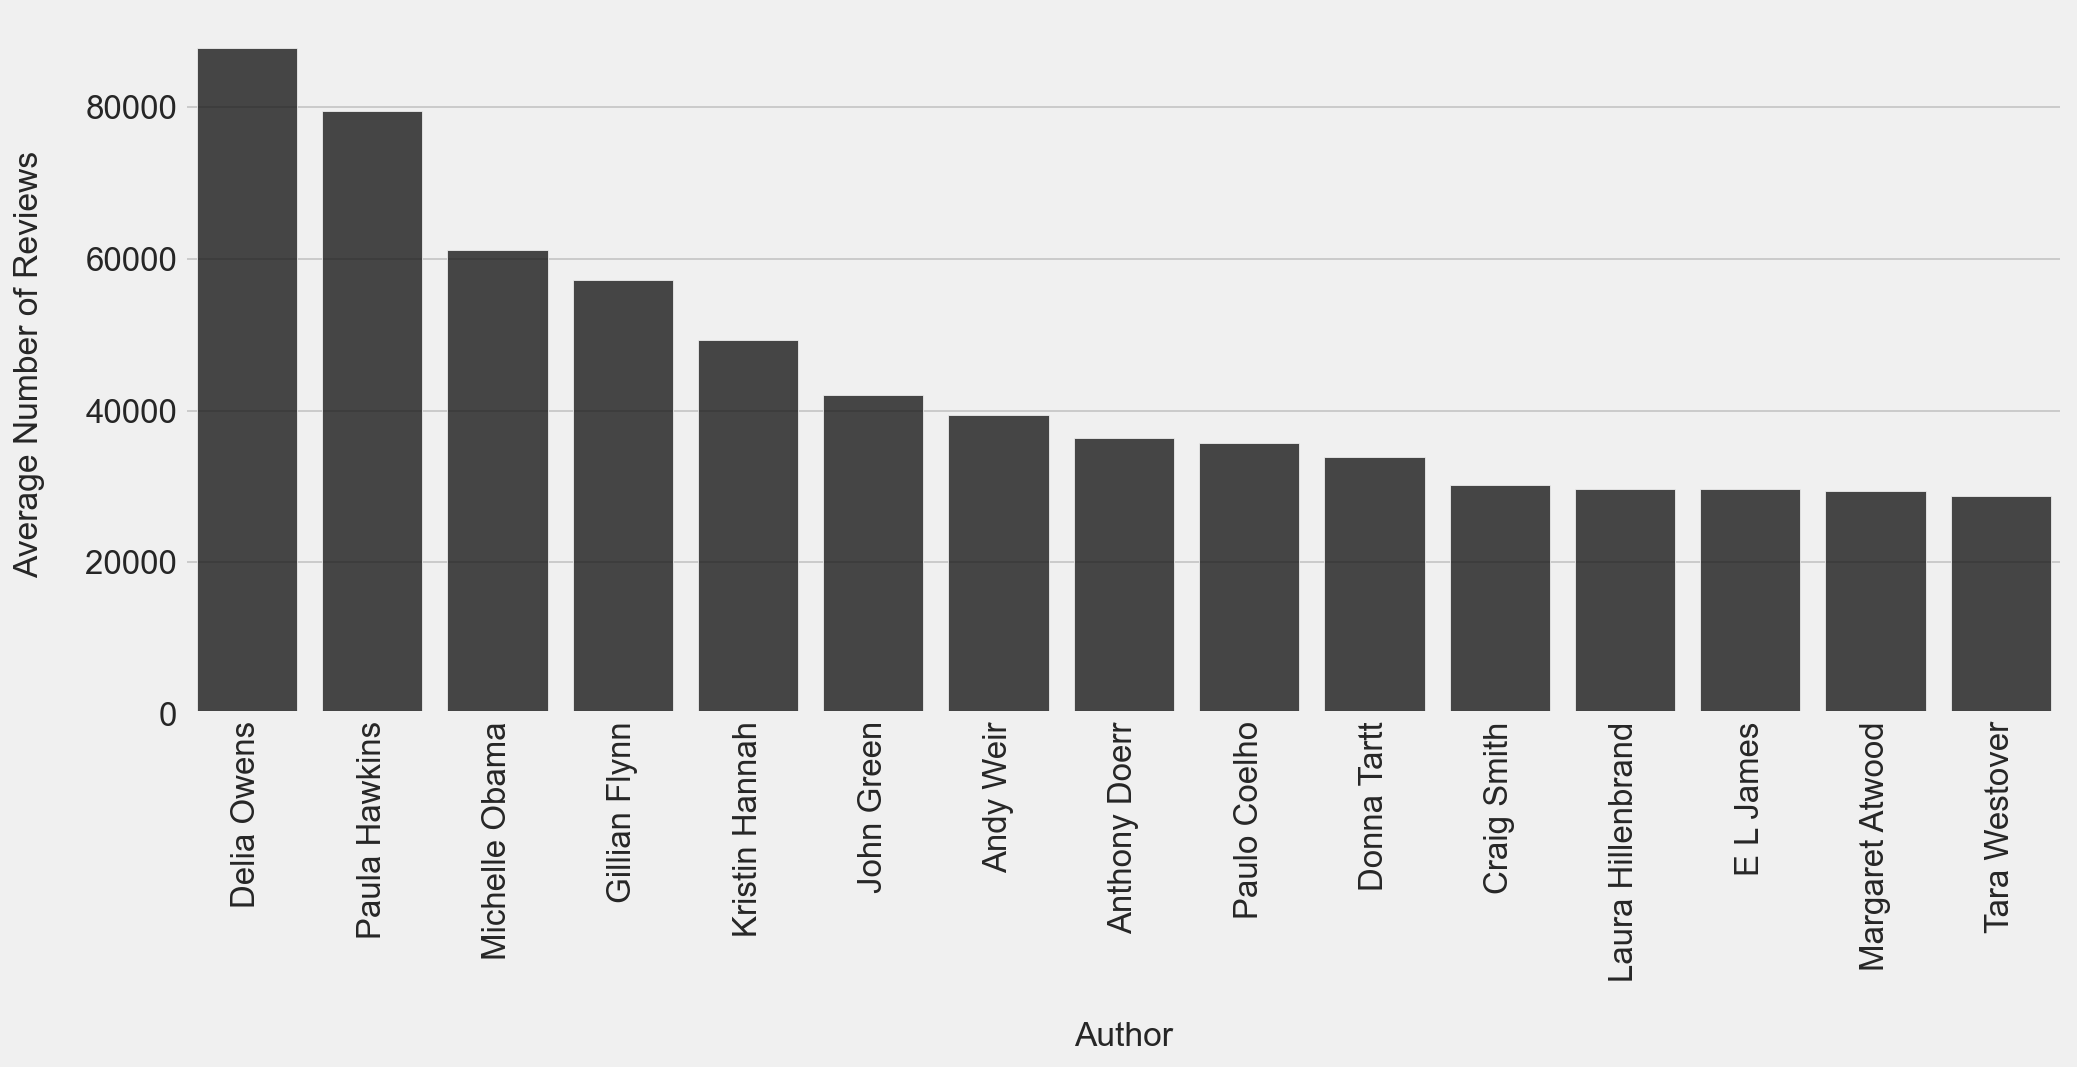

In [12]:
#plotting the most reviewed authors by the average number of reviews
most_reviewed_authors = amazon_books.groupby('author', as_index=False)[['reviews']].mean()\
                        .sort_values('reviews', ascending=False).head(15)

fig, ax = plt.subplots(figsize=(15, 6))
sns.barplot(data=most_reviewed_authors, x='author', y='reviews',
            alpha=0.8, color='k', ax=ax)
ax.set_xlabel('Author', labelpad=20)
ax.set_ylabel('Average Number of Reviews', labelpad=20)
plt.xticks(rotation=90)
plt.show()

Looking at the top ranked authors by the average number of reviews, we see a pronounced positive skew, with Delia Owens and Paula Hawkins taking over the top two spots.

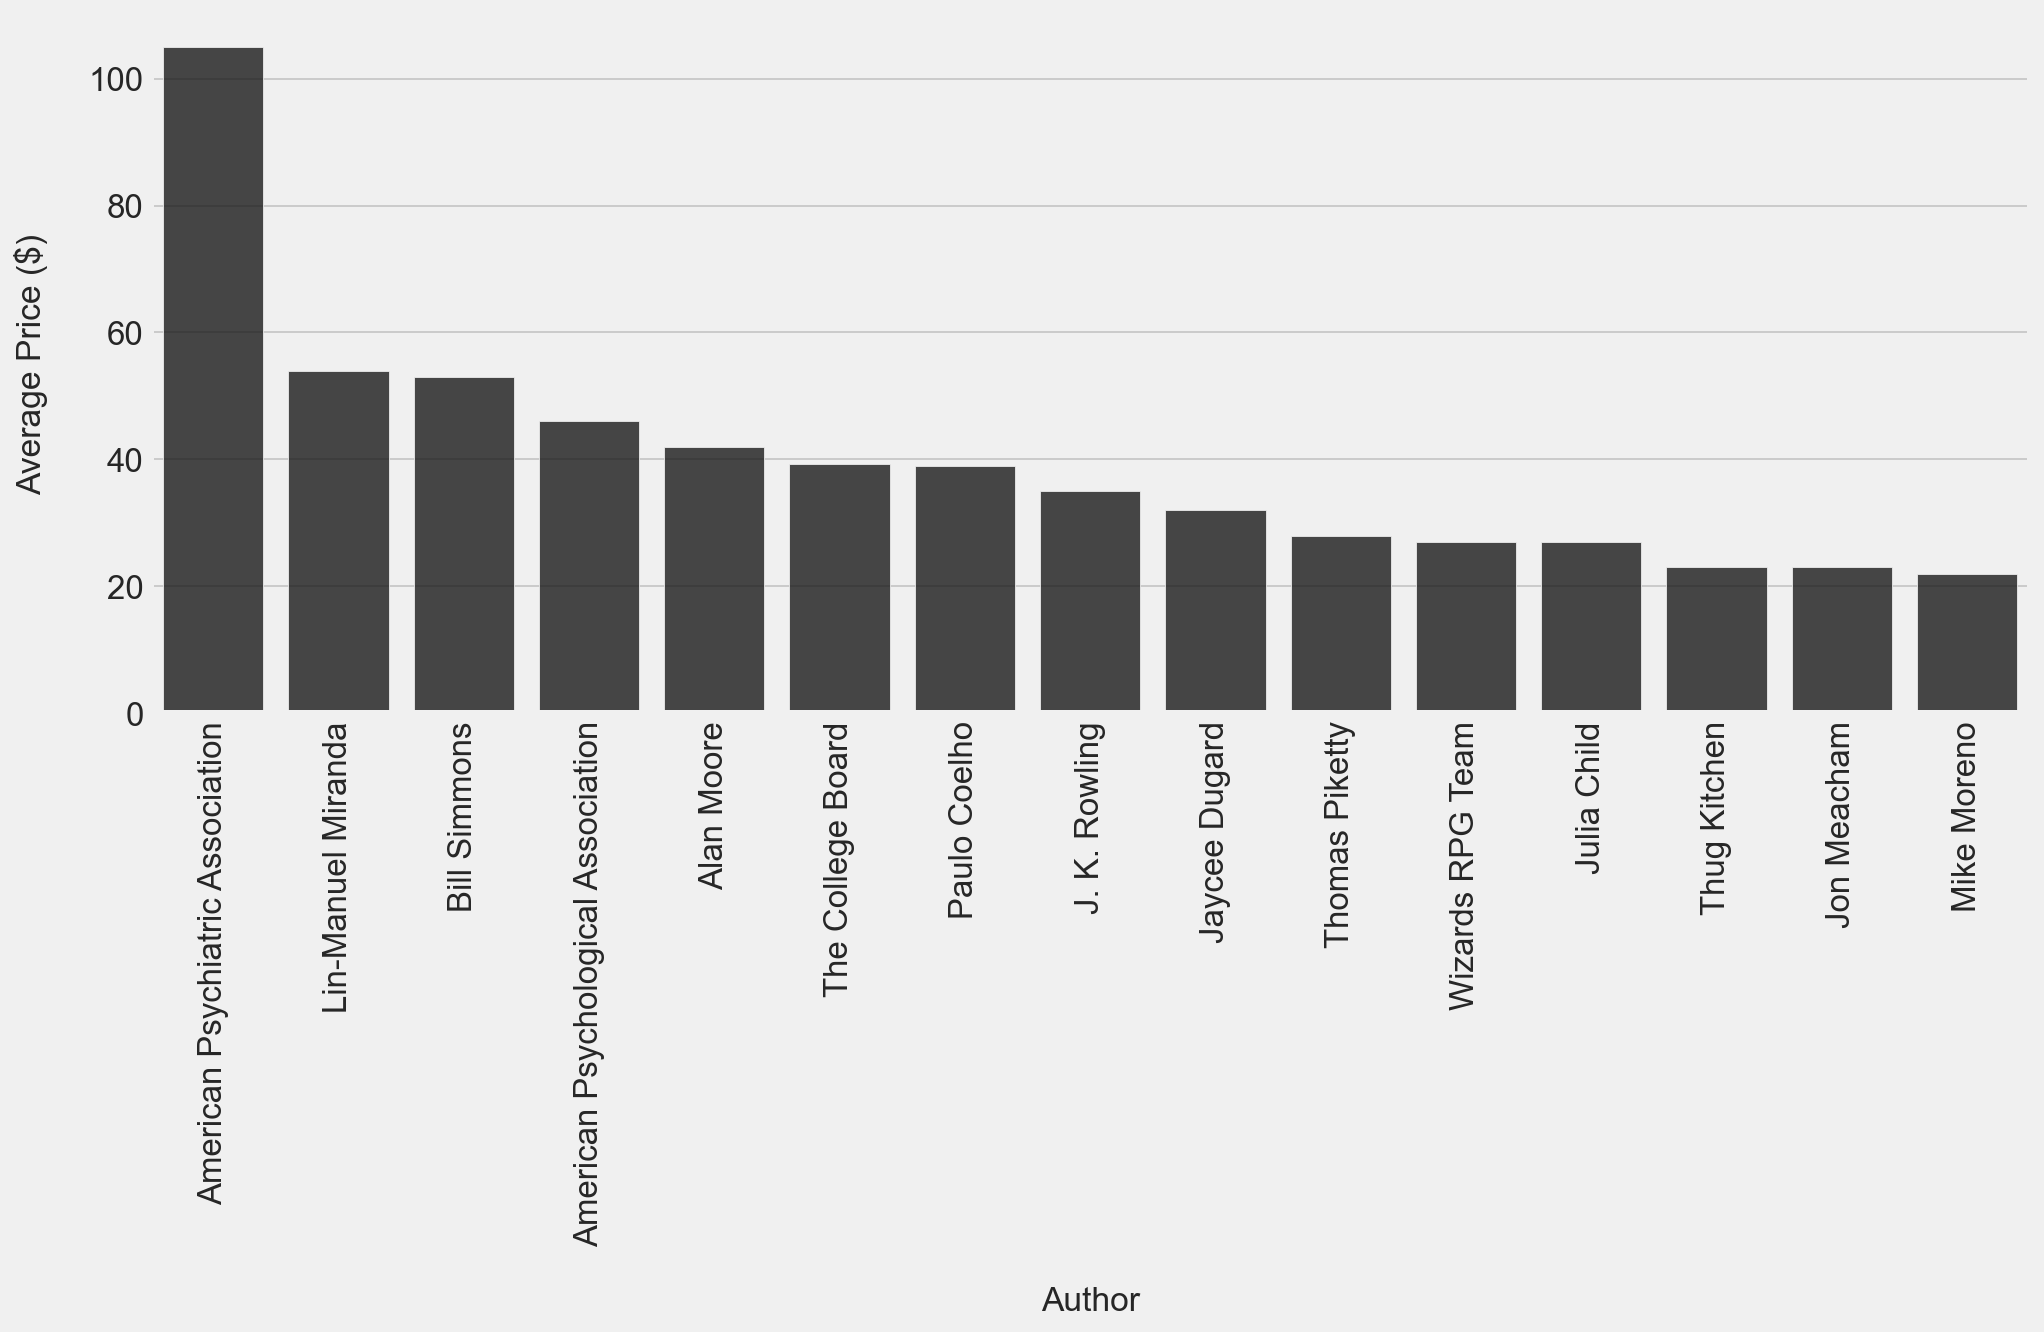

In [13]:
#plotting the most expensive authors by the average price
most_expensive_authors = amazon_books.groupby('author', as_index=False)[['price']].mean()\
                            .sort_values('price', ascending=False).head(15)

fig, ax = plt.subplots(figsize=(15, 6))
sns.barplot(data=most_expensive_authors, x='author', y='price',
            alpha=0.8, color='k', ax=ax)
ax.set_xlabel('Author', labelpad=20)
ax.set_ylabel('Average Price ($)', labelpad=20)
plt.xticks(rotation=90)
plt.show()

The distribution of top authors by average price is also highly skewed, while the list is more or less dominated by non-fiction authors and sources.

### Top Titles

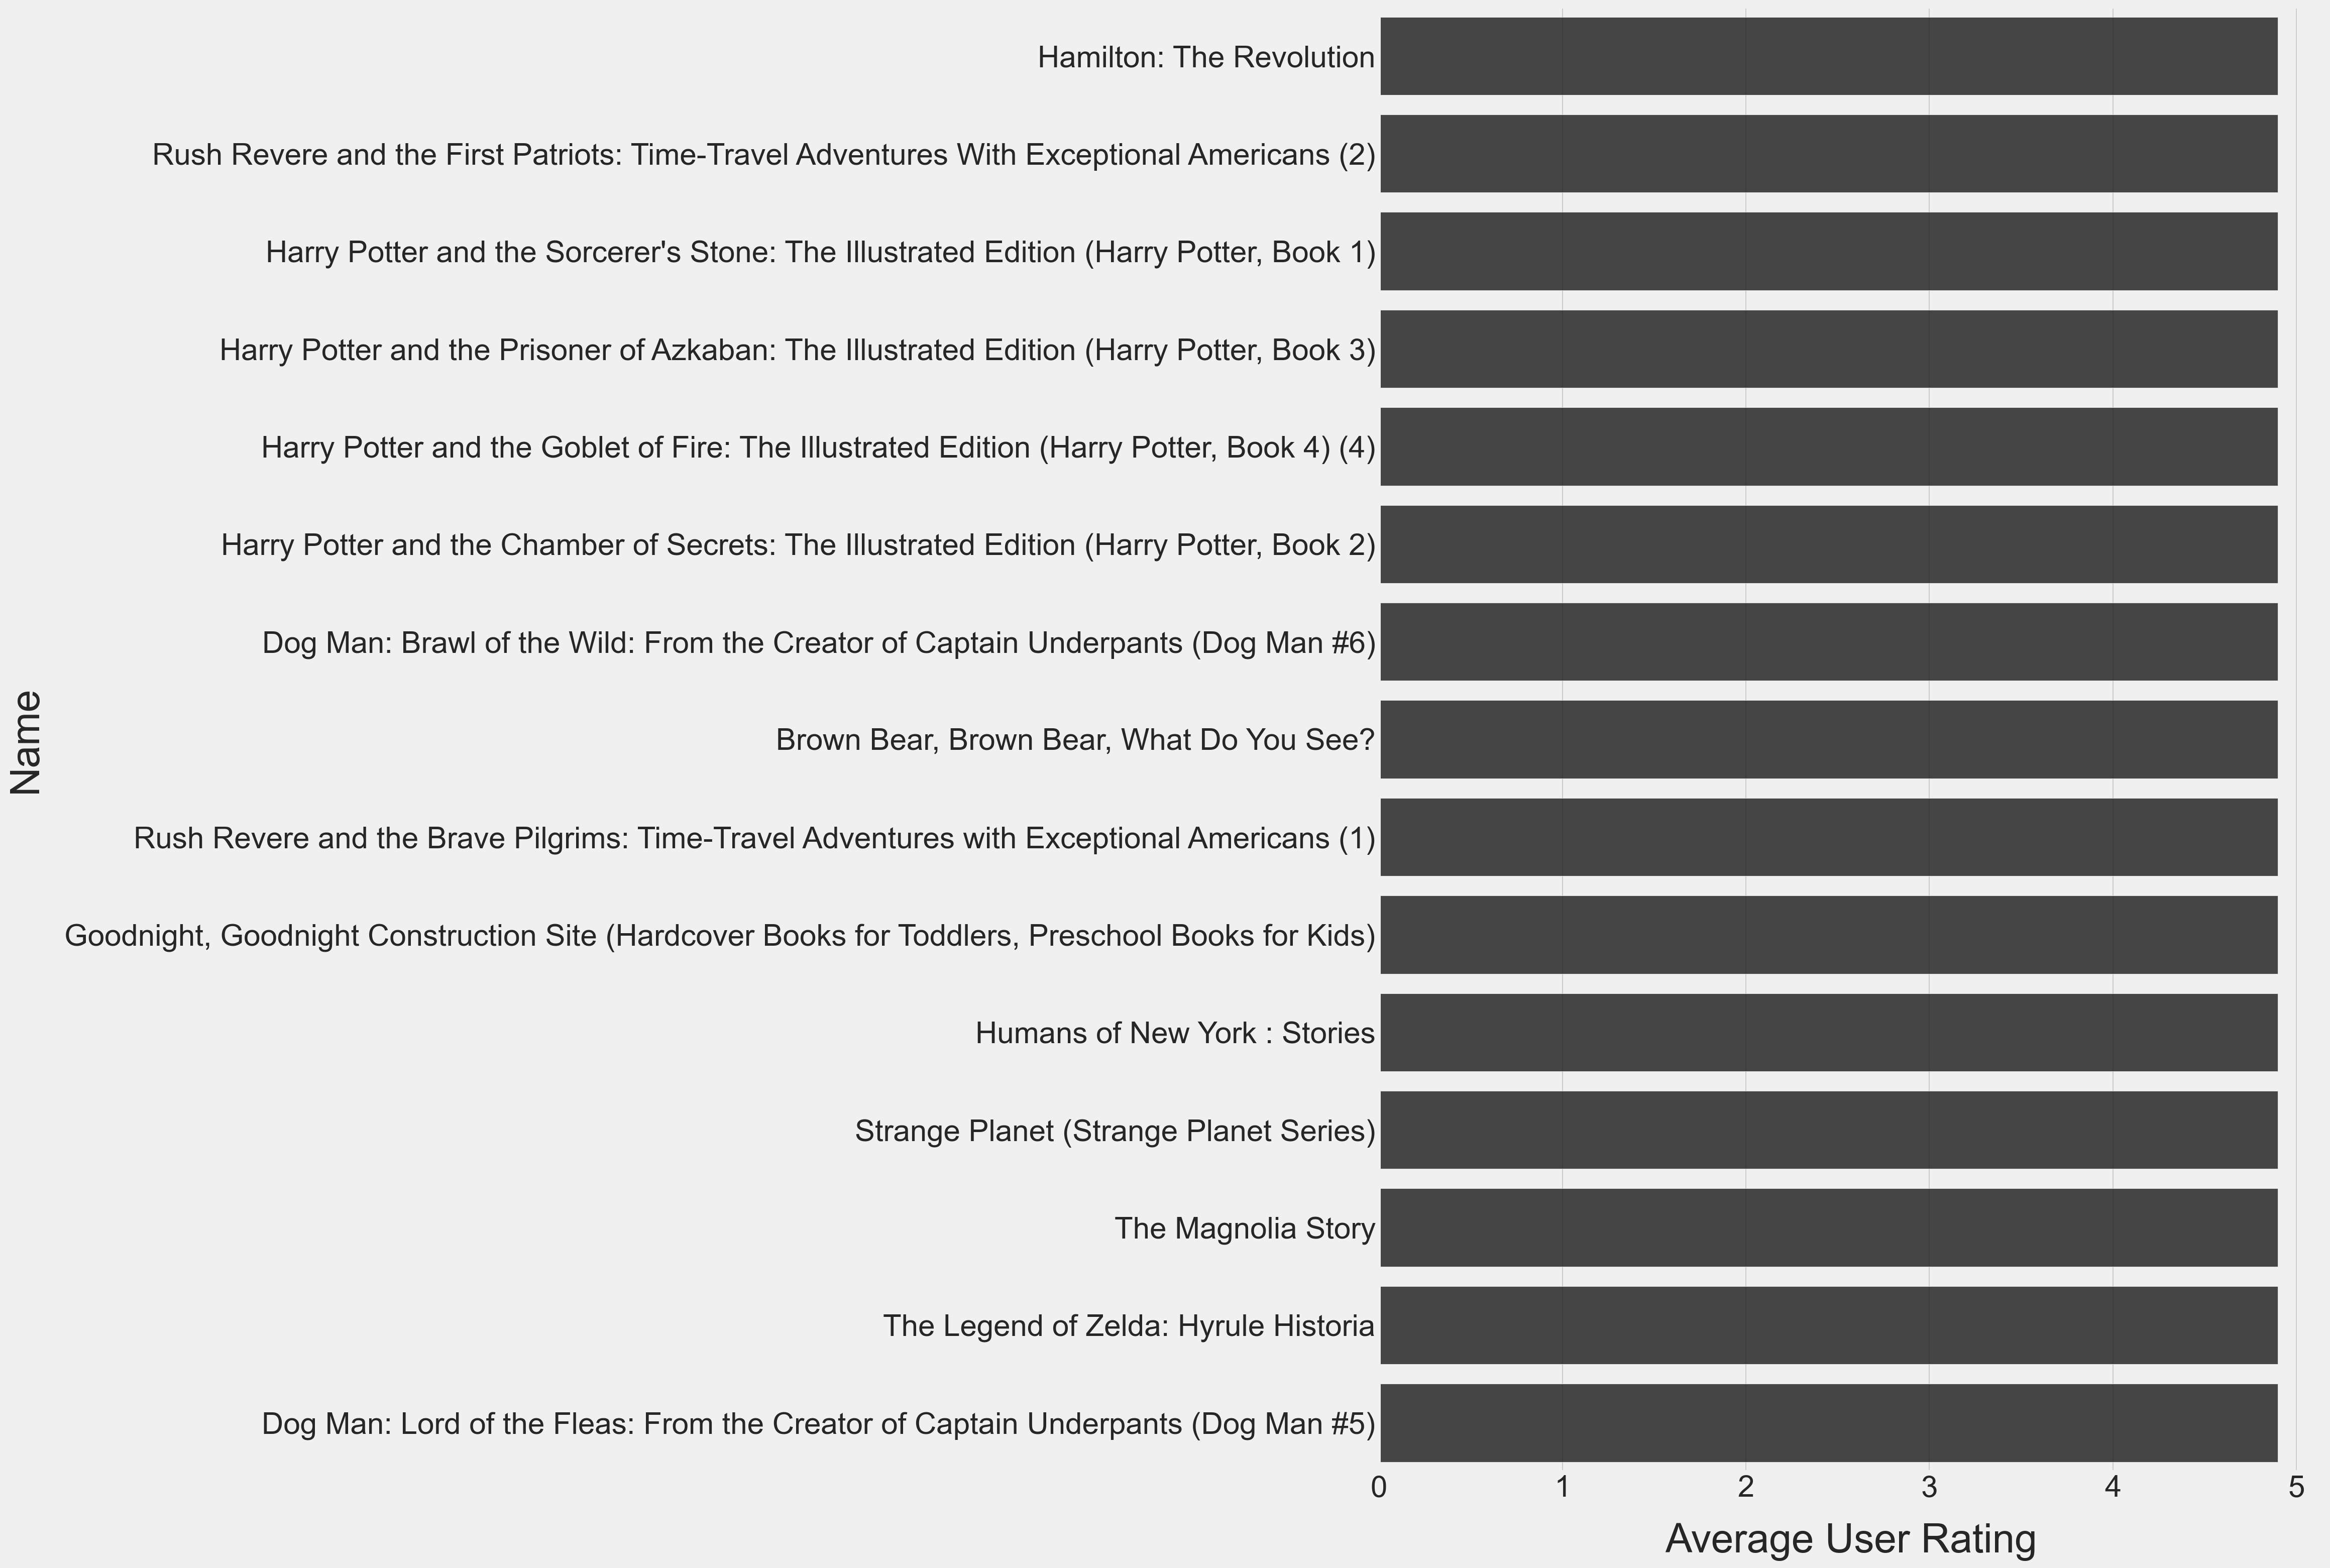

In [14]:
#plotting the highest rated titles by average user rating
highest_rated_titles = amazon_books.groupby('name', as_index=False)[['rating']].mean()\
                        .sort_values('rating', ascending=False).head(15)

fig, ax = plt.subplots(figsize=(15, 25))
sns.barplot(data=highest_rated_titles, y='name', x='rating',
            alpha=0.8, color='k', ax=ax)
ax.set_ylabel('Name', fontsize=40, labelpad=20)
ax.set_xlabel('Average User Rating', fontsize=40, labelpad=20)
plt.xticks(fontsize=30)
plt.yticks(fontsize=30)
plt.show()

All the top 15 books achieve are rated, on average, 4.9 by readers, and fictions form the majority. Harry Potter books appear prominently in this list.

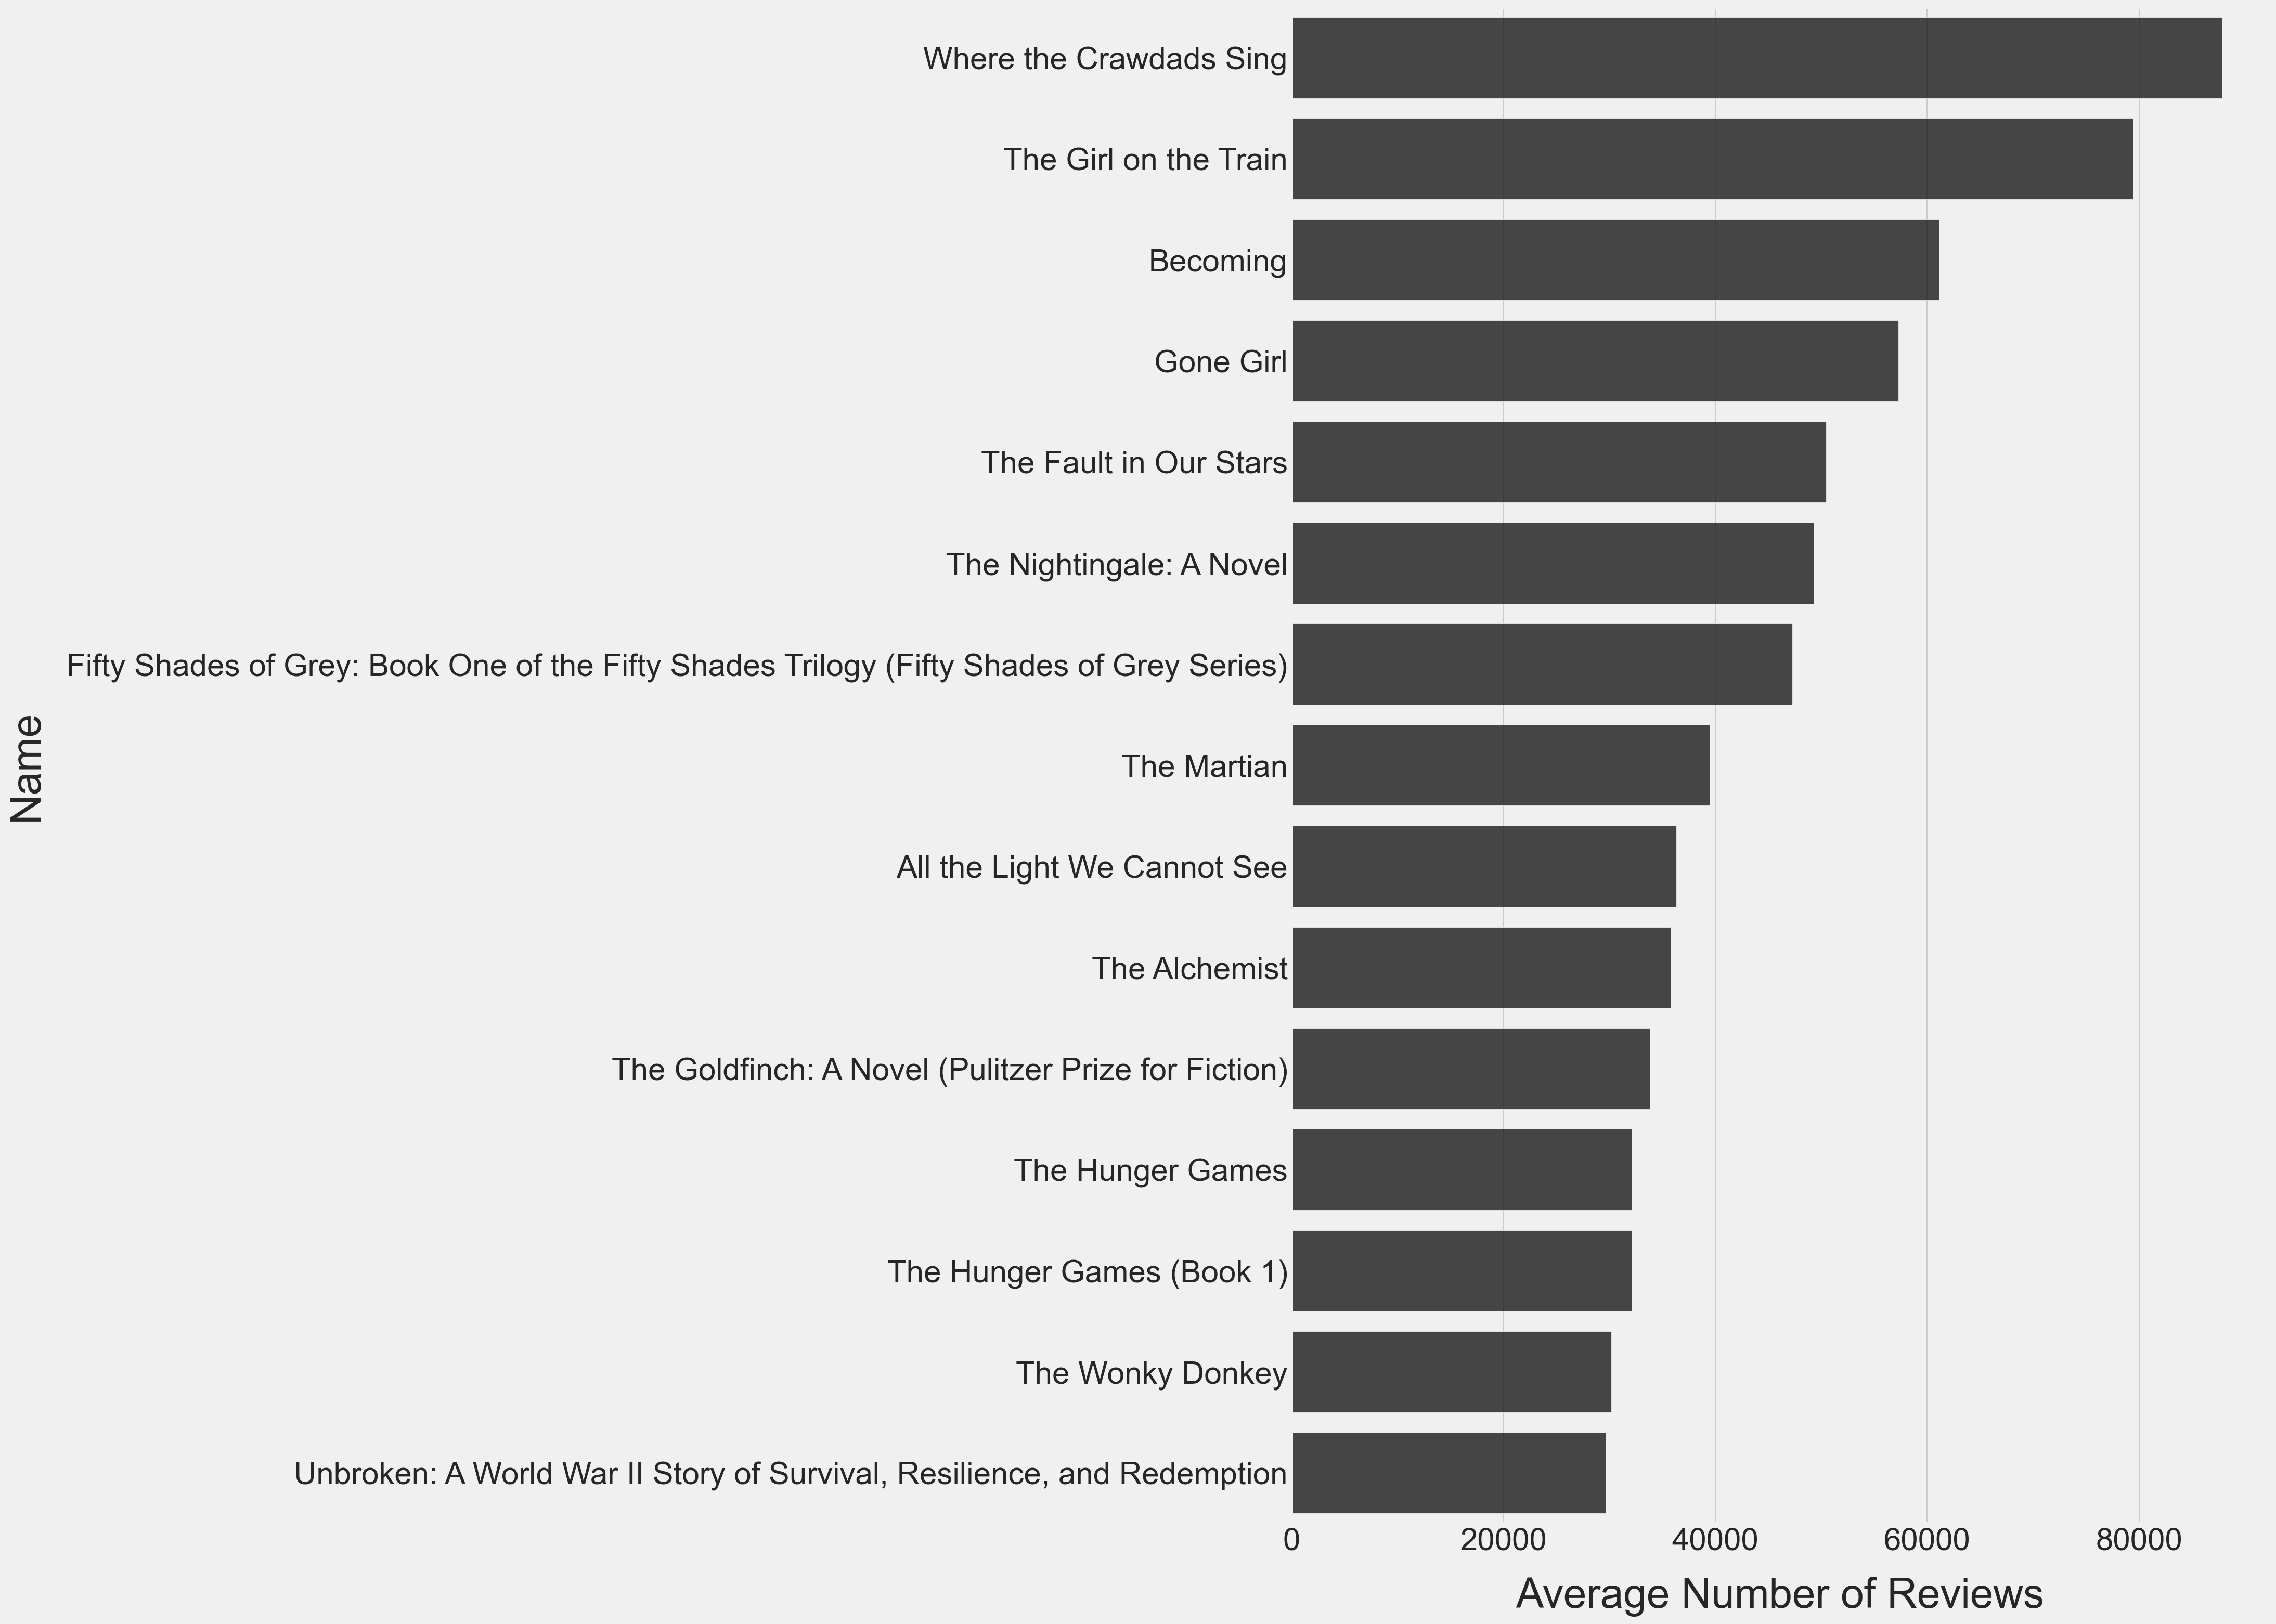

In [15]:
#plotting the most reviewed titles by average number of reviews
most_reviewed_titles = amazon_books.groupby('name', as_index=False)[['reviews']].mean()\
                        .sort_values('reviews', ascending=False).head(15)

fig, ax = plt.subplots(figsize=(15, 25))
sns.barplot(data=most_reviewed_titles, y='name', x='reviews',
            alpha=0.8, color='k', ax=ax)
ax.set_ylabel('Name', fontsize=40, labelpad=20)
ax.set_xlabel('Average Number of Reviews', fontsize=40, labelpad=20)
plt.xticks(fontsize=30)
plt.yticks(fontsize=30)
plt.show()

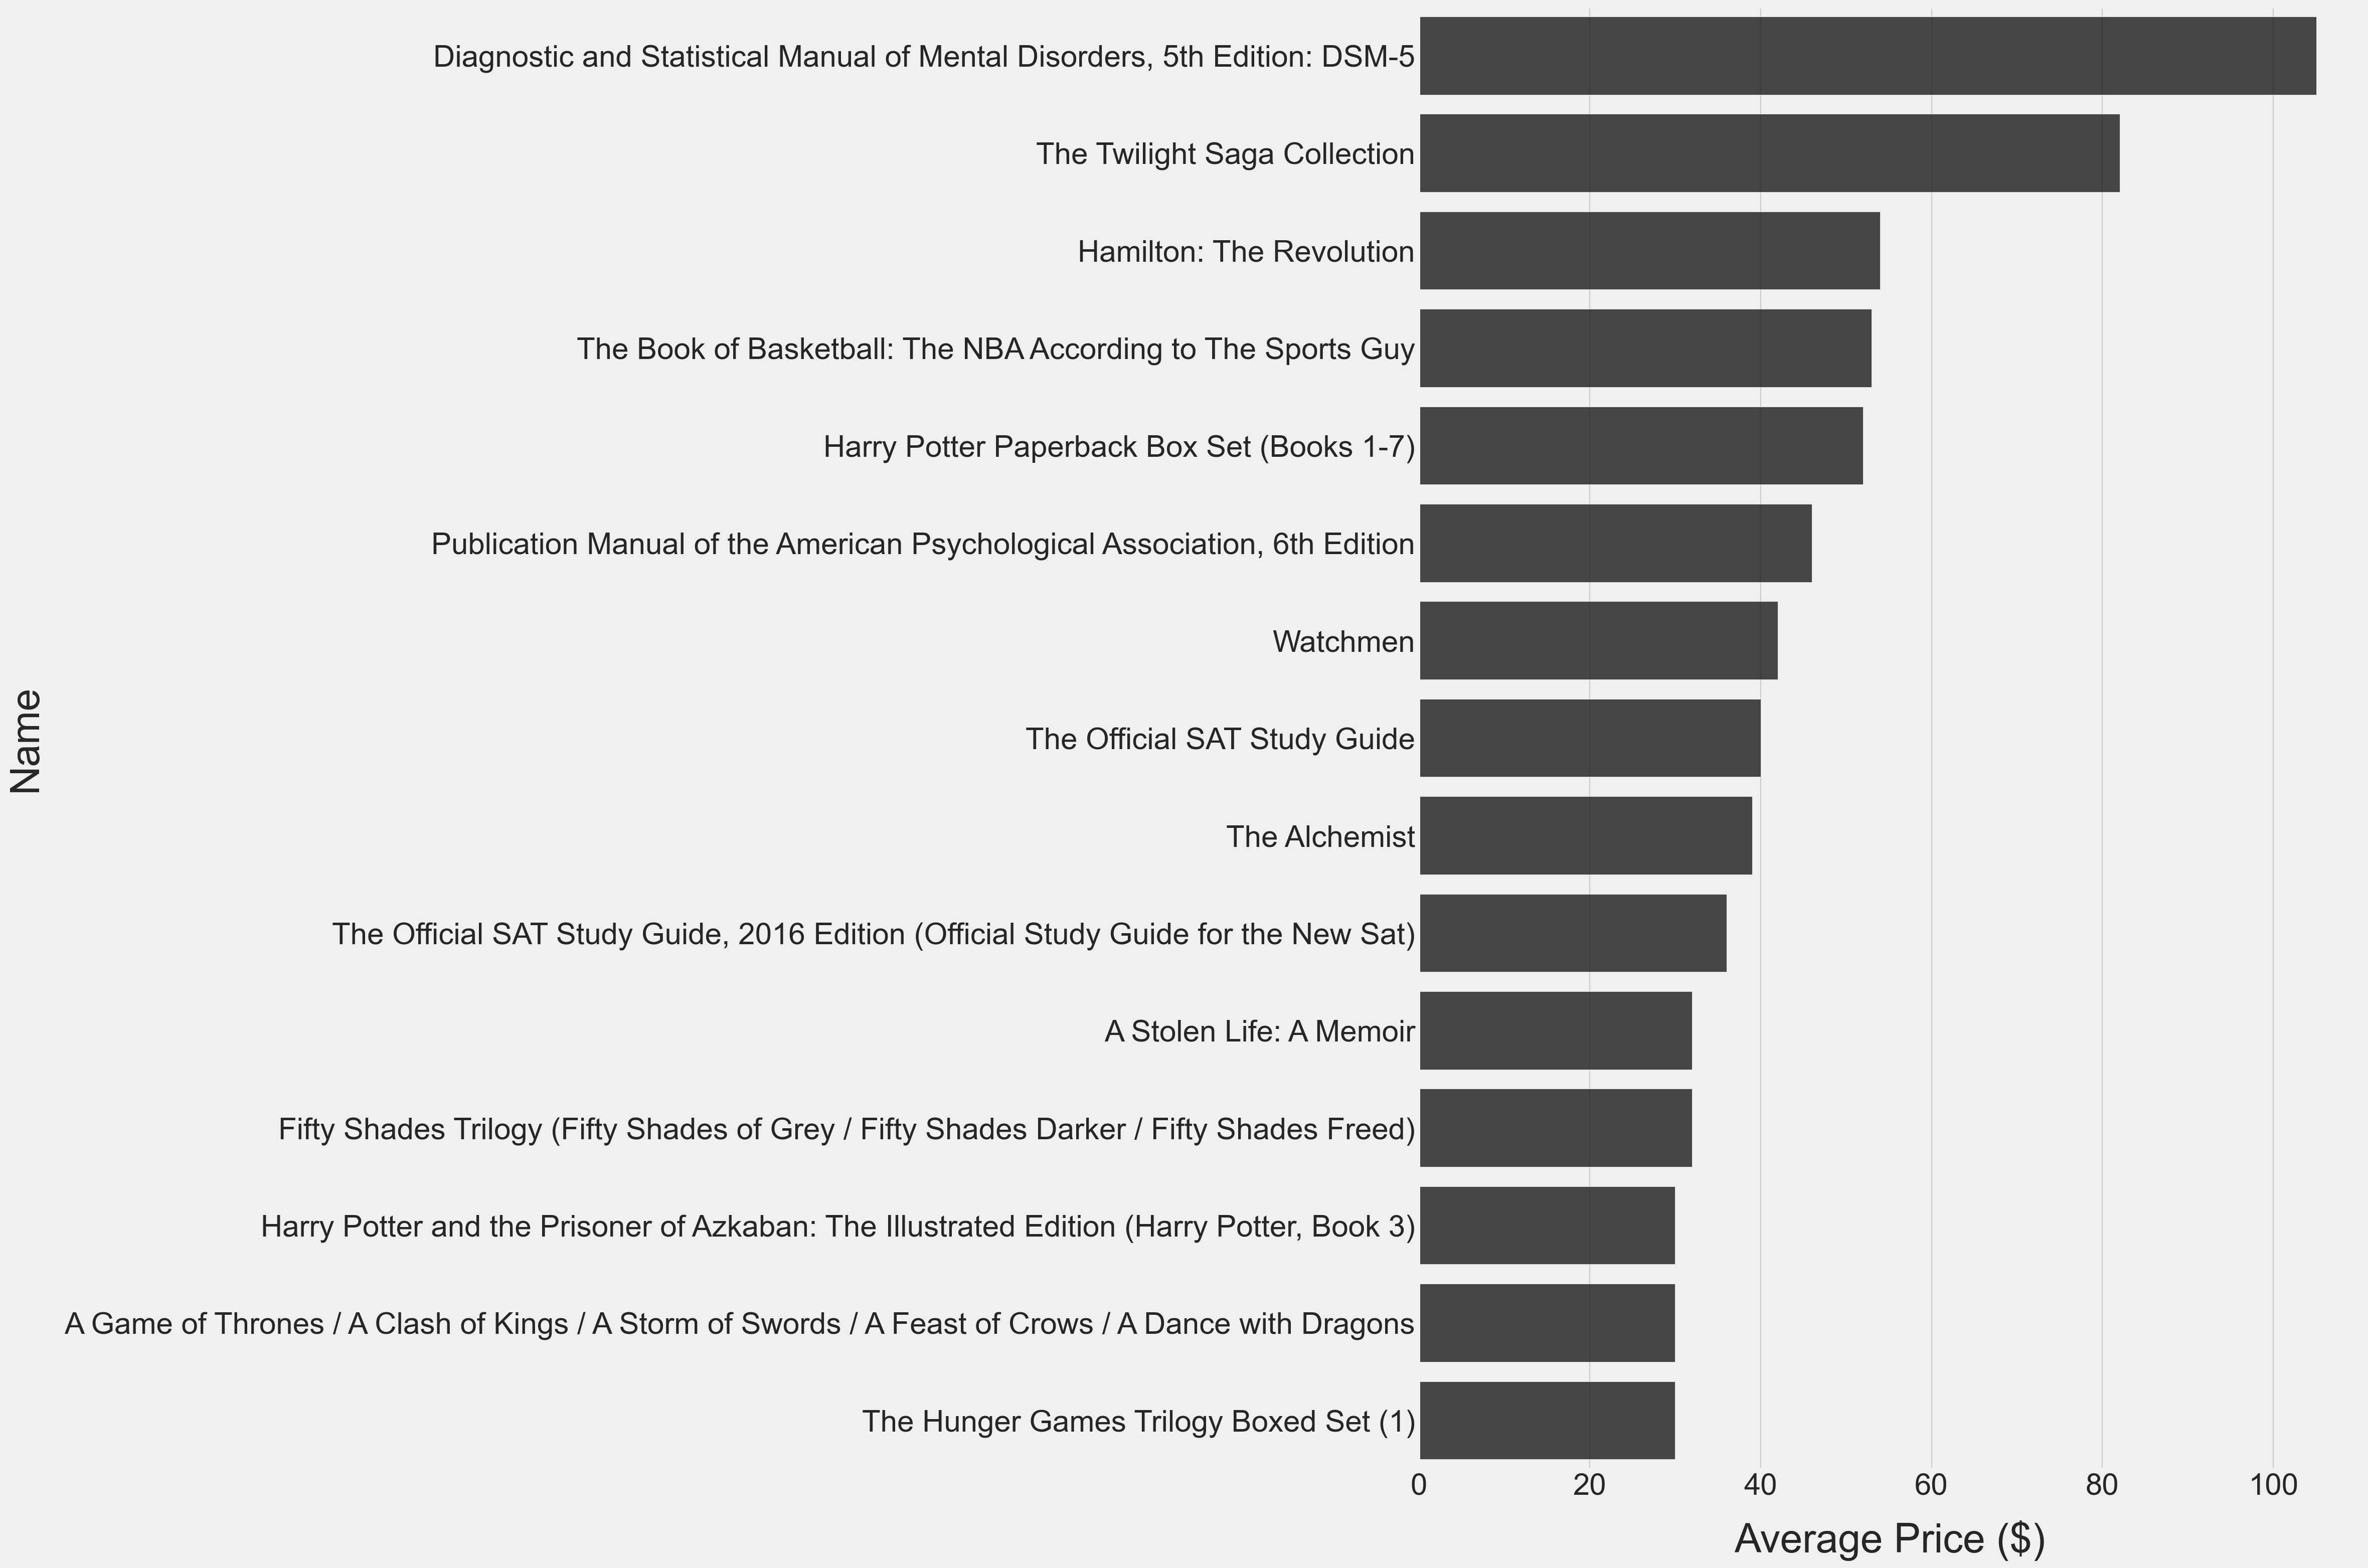

In [16]:
#plotting the most expensive titles by the average price
most_expensive_titles = amazon_books.groupby('name', as_index=False)[['price']].mean()\
                            .sort_values('price', ascending=False).head(15)

fig, ax = plt.subplots(figsize=(15, 25))
sns.barplot(data=most_expensive_titles, y='name', x='price',
            alpha=0.8, color='k', ax=ax)
ax.set_ylabel('Name', fontsize=40, labelpad=20)
ax.set_xlabel('Average Price ($)', fontsize=40, labelpad=20)
plt.xticks(fontsize=30)
plt.yticks(fontsize=30)
plt.show()

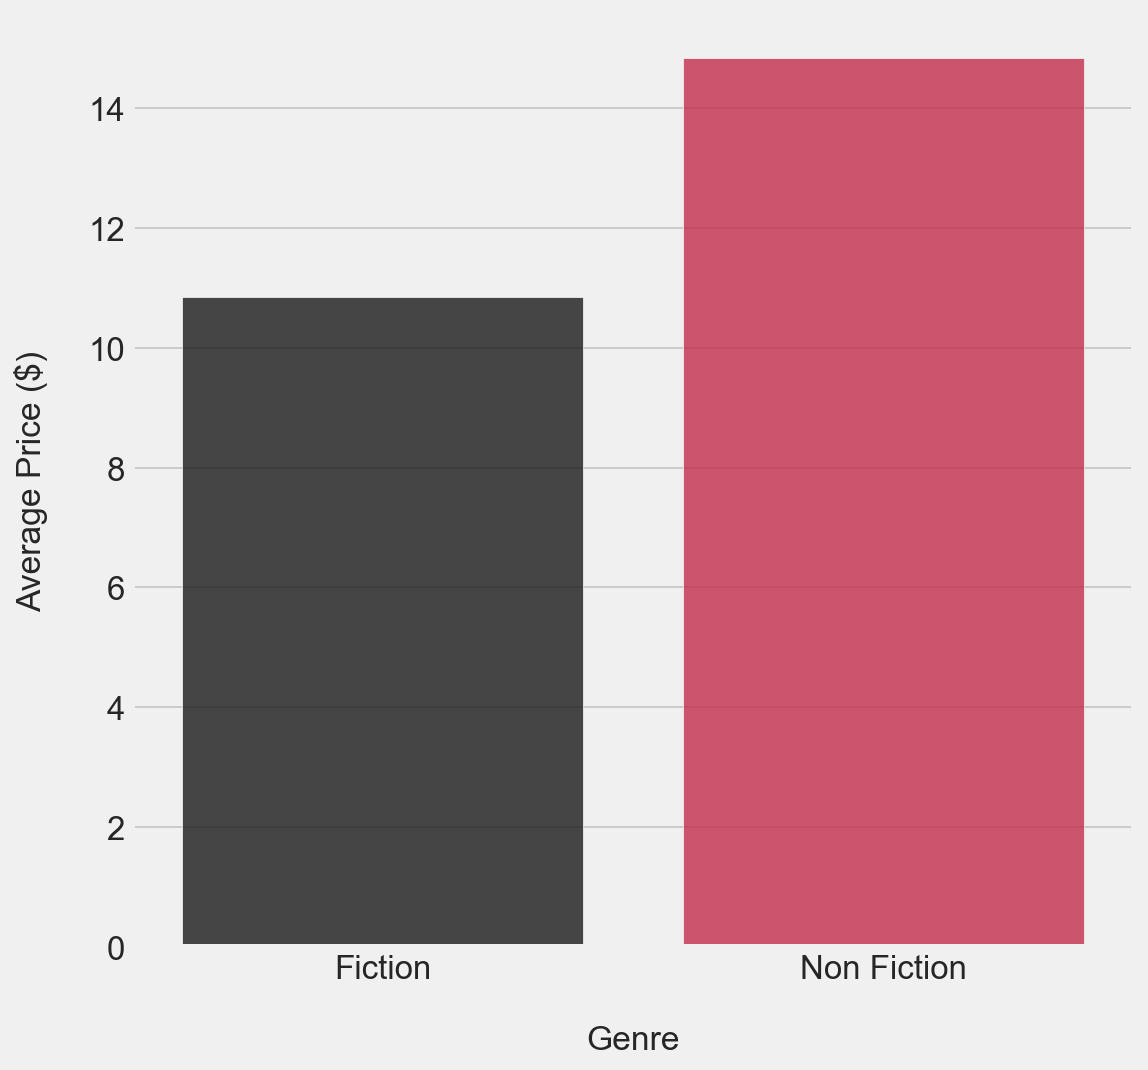

In [17]:
#displaying the average price for fiction and non-fiction books
genre_mean_price = amazon_books.groupby('genre', as_index=False)[['price']].mean()

fig, ax = plt.subplots(figsize=(8, 8))
sns.barplot(data=genre_mean_price, x='genre', y='price', alpha=0.8, palette=['k', 'crimson'], ax=ax)
ax.set_ylabel('Average Price ($)', labelpad=20)
ax.set_xlabel('Genre', labelpad=20)
plt.show()